# Report on BMW Pricing Analysis

**Introduction:**
The estimation of used car prices is a crucial aspect of the automotive business, influenced by various factors such as market trends, car features, and external factors. In this report, we analyze a dataset comprising nearly 5000 real BMW cars sold via auction in 2018. The dataset includes information on car characteristics and features, providing an opportunity to explore the factors affecting car prices.

**Data Overview:**
The dataset consists of 18 columns, including information on the car's maker key, model key, mileage, engine power, registration date, fuel type, paint color, car type, eight binary features, price, and sale date. After initial data cleanup, including filtering out cars with engine damage, the dataset contains 4843 entries.

**Key Findings and Insights:**

1. **Distribution of Car Prices:**
   - The histogram of car prices reveals a right-skewed distribution, indicating that most cars are priced lower, with a long tail of higher-priced cars.

2. **Effect of Fuel Type on Price:**
   - A boxplot analysis shows variations in prices based on fuel type, with diesel cars generally having higher median prices compared to petrol and hybrid cars.

3. **Relationships between Numerical Features:**
   - Pairplot analysis indicates potential correlations between numerical features such as mileage, engine power, and price. Further exploration through correlation heatmap reveals moderate positive correlations between mileage and price.

4. **Car Type Distribution:**
   - A countplot illustrates the distribution of car types, with sedan being the most common type followed by coupe and convertible.

5. **Price Trends Over Time:**
   - Analysis of average prices over the years highlights fluctuations, suggesting potential seasonal patterns or market trends influencing car prices.

6. **Impact of Paint Color on Price:**
   - Cars with certain paint colors tend to have higher average prices, as observed from the barplot analysis of average prices by paint color.

7. **Effect of Features on Price:**
   - Boxplot analysis demonstrates the impact of binary features on car prices, indicating variations in prices based on the presence or absence of specific features.

8. **Variation in Prices by Model Key:**
   - Average price analysis by model key reveals significant differences in prices among different BMW models, providing insights into model popularity and desirability.

9. **Influence of Maker Key on Prices:**
   - Violinplot analysis suggests variations in prices based on the car's maker key, reflecting potential differences in brand perception and market positioning.

**Conclusion:**
Through comprehensive analysis and visualization of the BMW pricing dataset, we gain valuable insights into the factors influencing used car prices. Understanding these factors, including the impact of features, fuel type, paint color, and model, is essential for accurate price estimation and informed decision-making in the automotive industry. Further analysis and modeling could provide deeper insights into the dynamics of car pricing and help in developing robust pricing strategies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/bmw-pricing-challenge/bmw_pricing_challenge.csv")

In [3]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
# Convert 'registration_date' and 'sold_at' to datetime
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['sold_at'] = pd.to_datetime(df['sold_at'])

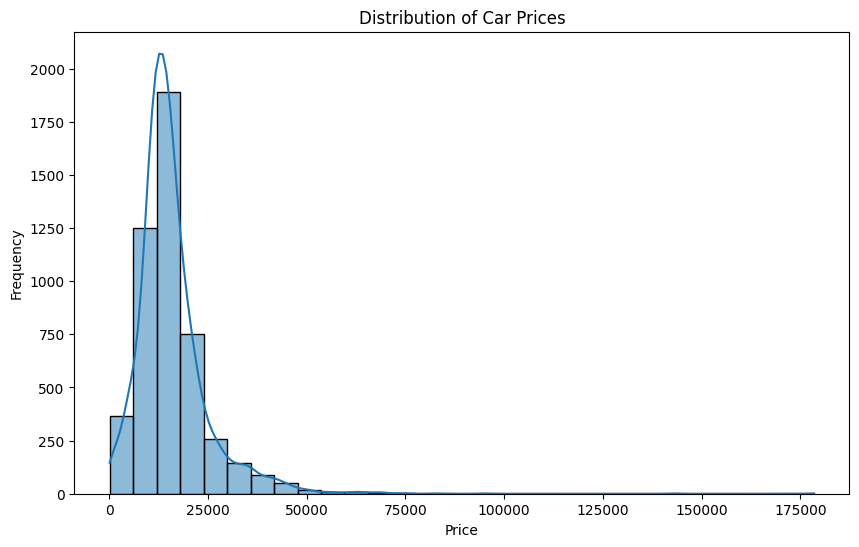

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

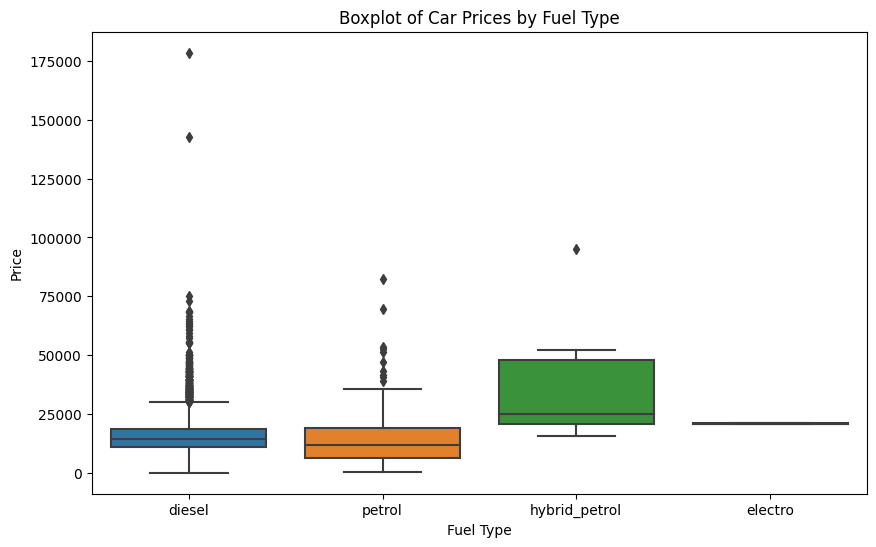

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Boxplot of Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

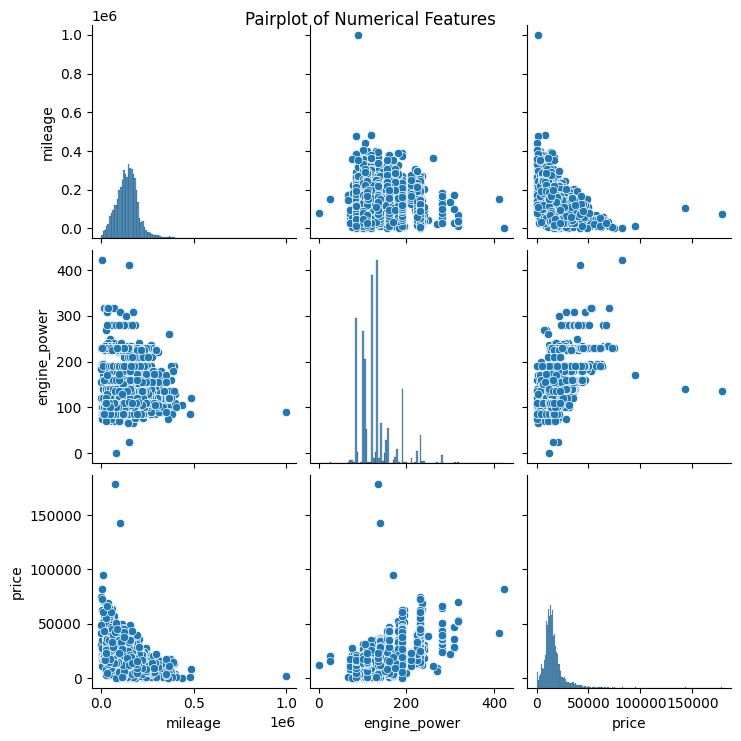

In [7]:
numerical_features = ['mileage', 'engine_power', 'price']
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

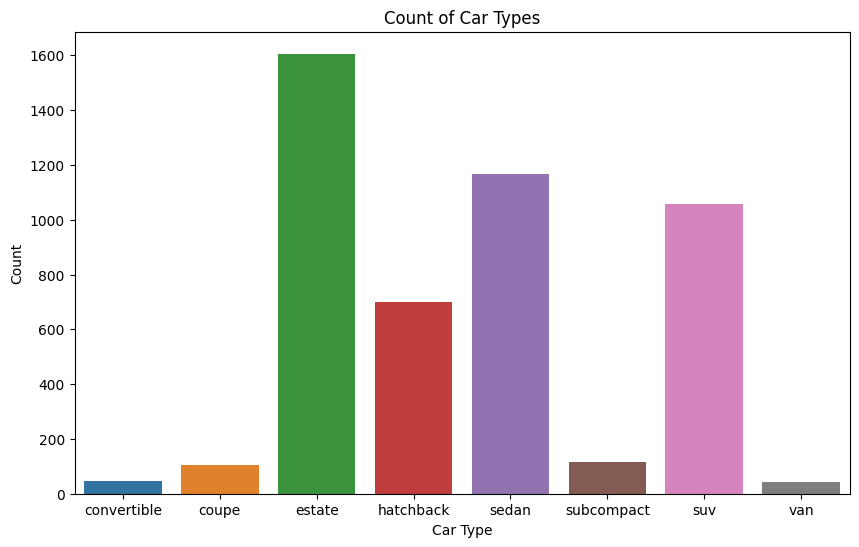

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='car_type', data=df)
plt.title('Count of Car Types')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.show()

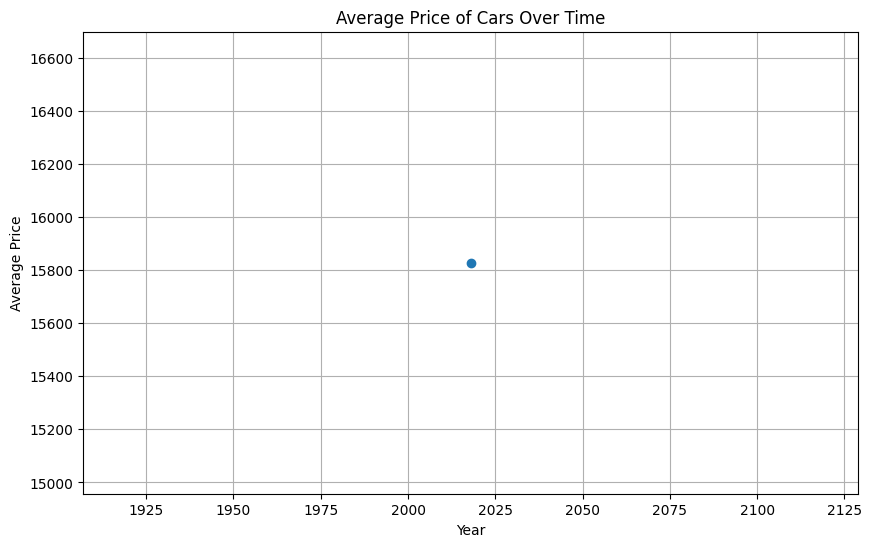

In [9]:
df['year_sold'] = df['sold_at'].dt.year
average_price_by_year = df.groupby('year_sold')['price'].mean()
plt.figure(figsize=(10, 6))
average_price_by_year.plot(marker='o')
plt.title('Average Price of Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

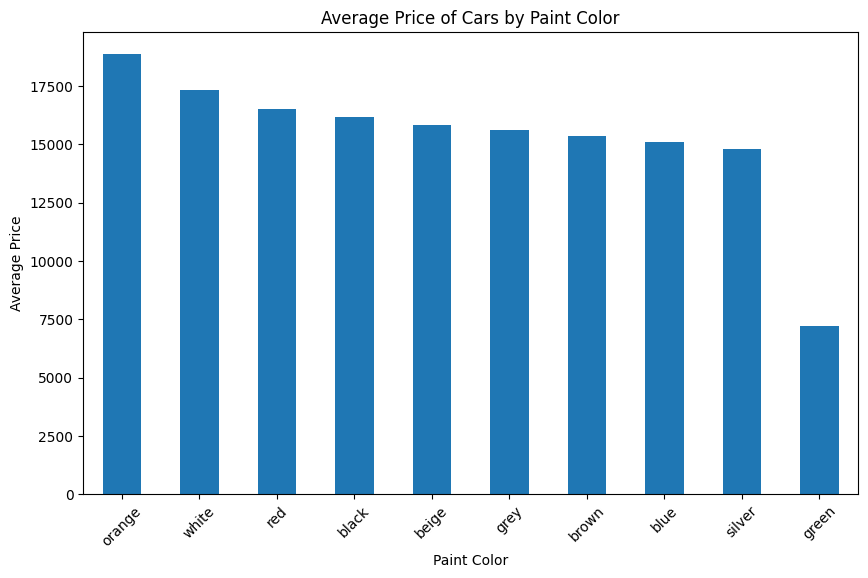

In [10]:
plt.figure(figsize=(10, 6))
average_price_by_color = df.groupby('paint_color')['price'].mean().sort_values(ascending=False)
average_price_by_color.plot(kind='bar')
plt.title('Average Price of Cars by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

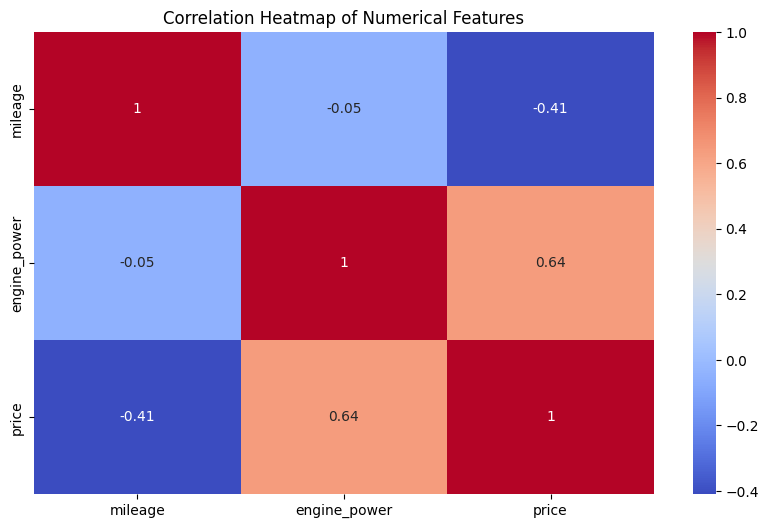

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

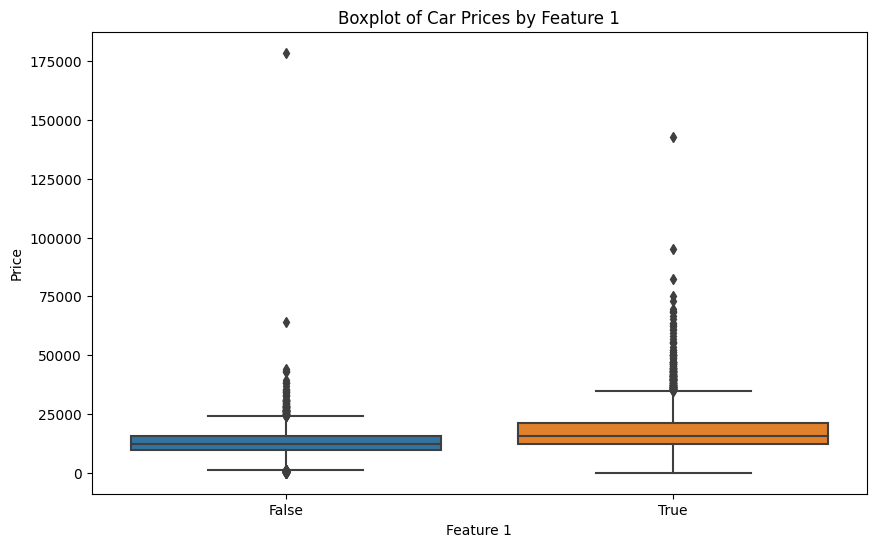

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='feature_1', y='price', data=df)
plt.title('Boxplot of Car Prices by Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Price')
plt.show()

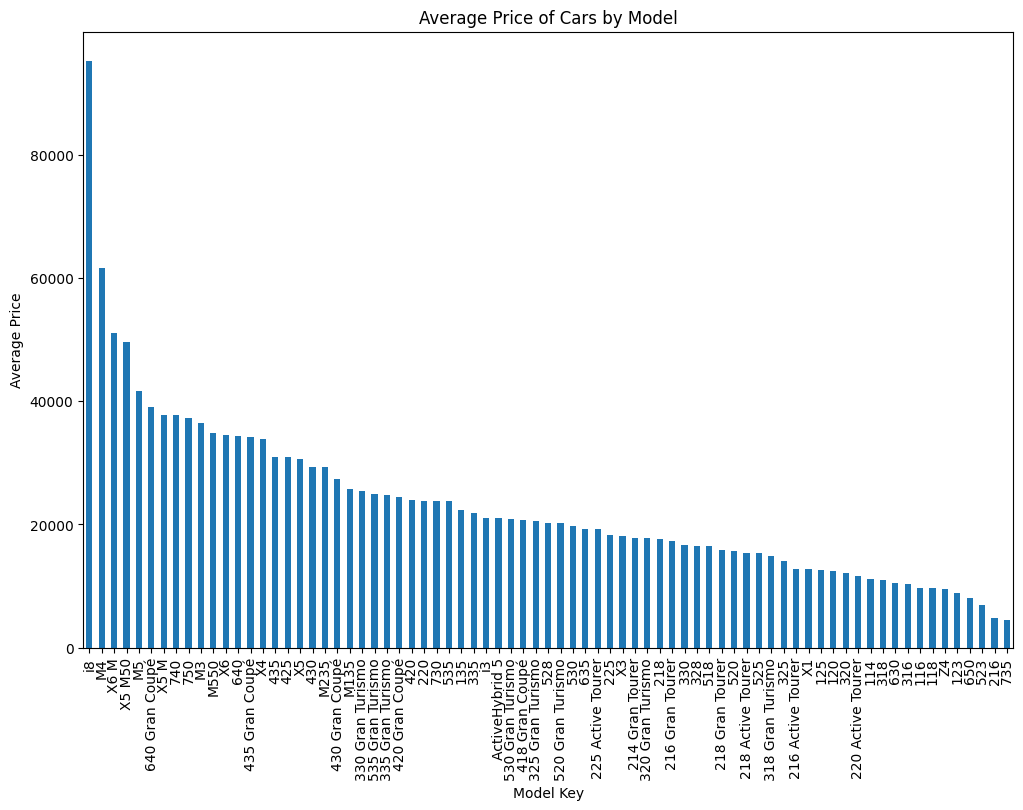

In [13]:
plt.figure(figsize=(12, 8))
average_price_by_model = df.groupby('model_key')['price'].mean().sort_values(ascending=False)
average_price_by_model.plot(kind='bar')
plt.title('Average Price of Cars by Model')
plt.xlabel('Model Key')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

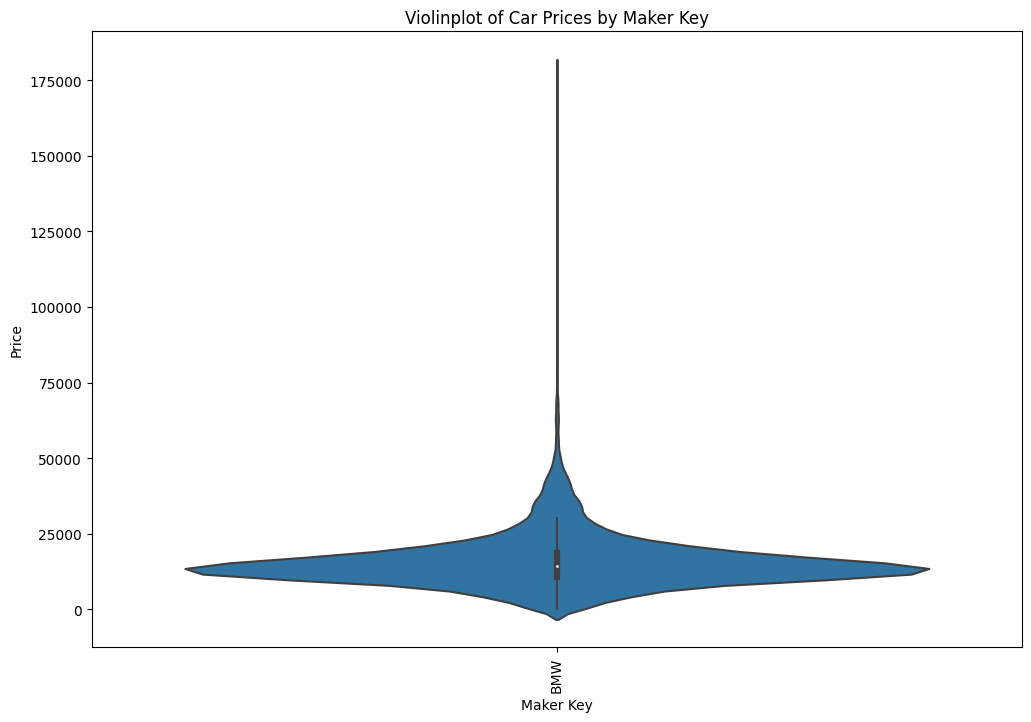

In [14]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='maker_key', y='price', data=df)
plt.title('Violinplot of Car Prices by Maker Key')
plt.xlabel('Maker Key')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()